# 태깅(Tagging) 
### : NLP에서 각 단어나 토큰에 대해 관련된 정보를 할당하는 작업

1. 품사 태깅(Part-of-Speach Tagging) : 각 단어나 토큰에 대해 단어의 품사(명사, 형용사, 동사 등)을 할당한다.

ex) The cat sat on the mat -> ['the', 'cat', 'sat', 'on', 'the', 'mat'] -> the:DT, cat:NN, sat:VBD, on:IN, the:DT, mat:NN
- DT : 한정사(determiner)
- NN : 명사(Noun)
- VBD : 과거형 동사(past tense verb)
- IN : 전치사(preposition)

2. 명명된 개체 인식(Named Entity Recognition, NER) : NLP에서 사람, 조직, 장소, 날짜 등 명명된 개체를 인식하고 태깅한다.

ex) Barack Obama was born in Hawaii. -> Barack:PERSON, Obama:PERSON, Hawaii:LOCATION

3. 의존 구문 분석(Dependency Parsing) : NLP에서 각 단어의 종속 관계를 식별하고 태깅한다.

ex) She enjoys playing piano. -> 중심(enjoys 동사), she 주어, playing 목적어

4. 문법적 관계 태깅(Constituency Parsing) : 문장의 구성 요소를 분석해서 계층 트리 구조로 표현 및 태깅한다.

5. 감정 분석(Sentiment Analysis) : 각 문장이나 토큰에 대해 감정을 태깅할 수 있다.

ex) I love NLP. (positive)

![image.png](attachment:69f2e327-548f-46b0-abdc-94eb300a7f32.png)

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jeon-yewon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [14]:
nltk.download('words')

[nltk_data] Downloading package words to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
from nltk import word_tokenize, pos_tag

text = 'The cat sat on the mat'

tokens = word_tokenize(text) # 토큰화

tagged = pos_tag(tokens) # 품사 태깅

print(tagged)

[('The', 'DT'), ('cat', 'NN'), ('sat', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('mat', 'NN')]


In [3]:
from nltk import ne_chunk

text = 'Barack Obama was born in Hawaii.'

tokens = word_tokenize(text)
tags = pos_tag(tokens)
entities = ne_chunk(tags)

print(tags)
print(entities)

[('Barack', 'NNP'), ('Obama', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Hawaii', 'NNP'), ('.', '.')]
(S
  (PERSON Barack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Hawaii/NNP)
  ./.)


In [4]:
import spacy

nlp = spacy.load('en_core_web_sm') # spacya의 사전 학습 모델(토큰화, POS 태깅, NER 등이 포함)

text = 'Barack Obama was born in Hawaii.'
doc = nlp(text)

entities = [(entity.text, entity.label_) for entity in doc.ents]
print(entities)

[('Barack Obama', 'PERSON'), ('Hawaii', 'GPE')]


In [5]:
from nltk import RegexpParser

text = 'The quick brown fox jumps over the lazy dog'
tokens = word_tokenize(text)
tags = pos_tag(tokens)

# 청킹 규칙 정의 : 품사 태그의 패턴을 정의하여 특정 부분을 추출한다.
grammer = 'NP: {<DT>?<JJ>*<NN>}'

cp = RegexpParser(grammer) # 청킹 파서 생성
tree = cp.parse(tags) # 품사 태깅된 토큰 리스트을 통해 청킹 트리를 생성한다.

print(tree)

(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumps/VBZ
  over/IN
  (NP the/DT lazy/JJ dog/NN))


# 청킹 규칙 정의 
### : 품사 태그의 패턴을 정의하여 특정 부분을 추출한다.

1. 기본
- {} : 패턴을 정의하는 부분

2. 반복 및 선택
- ? : 0개 또는 1개의 품사 태그
- * : 0개 이상 품사 태그
- + : 1개 이상 품사 태그

(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumps/VBZ
  over/IN
  (NP the/DT lazy/JJ dog/NN))

S ... : 문장(Sentence)을 의미하는 최상위 노드
(NP The/DT quick/JJ brown/NN) (NP fox/NN) : 명사구 (The quick brown fox)
(NP the/DT lazy/JJ dog/NN) : 명사구 (The lazy dog)

In [6]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [8]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
len(tagged_sentences)

3914

In [9]:
print(tagged_sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [10]:
sentences, pos_tags = [], [] # 단어와 태그 부분을 나누어 작업 진행

for tagged_sentence in tagged_sentences:
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    pos_tags.append(list(tag_info))

In [13]:
print(sentences[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']


In [14]:
print(pos_tags[0])

['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


### 모델로 태깅처리(x(sentences) 데이터로 y(pos_tags) 데이터 예측하기))
1. 데이터 분리(sentences, pos_tags)
2. 토큰화(두 가지 모두 단어 형식)
* 그동안은 숫자/숫자 또는 숫자/문자를 기준으로 토큰화 처리 했다면, 이번 코드에선 문자/문자를 기준으로 토큰화 처리하는 것에 집중하여 살펴본다.

3. 패딩(Padding) 작업
4. 분류
5. 모델학습

In [15]:
def tokenize(samples):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(samples)
    return tokenizer

In [24]:
src_tokenizer = tokenize(sentences)
tag_tokenizer = tokenize(pos_tags)

In [25]:
vocab_size = len(src_tokenizer.word_index) + 1
print('단어 집합의 크기 : ', vocab_size)

단어 집합의 크기 :  11388


In [26]:
tag_size = len(tar_tokenizer.word_index) + 1
print('태깅 집합의 크기 : ', tag_size)

태깅 집합의 크기 :  47


In [27]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tag_tokenizer.texts_to_sequences(pos_tags)

In [28]:
print(X_train[0], y_train[0])

[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3] [3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9]


In [30]:
print('최대 길이 : ', max(len(l) for l in X_train))
print('평균 길이 : ', (sum(map(len, X_train))/len(X_train)))

최대 길이 :  271
평균 길이 :  25.722023505365357


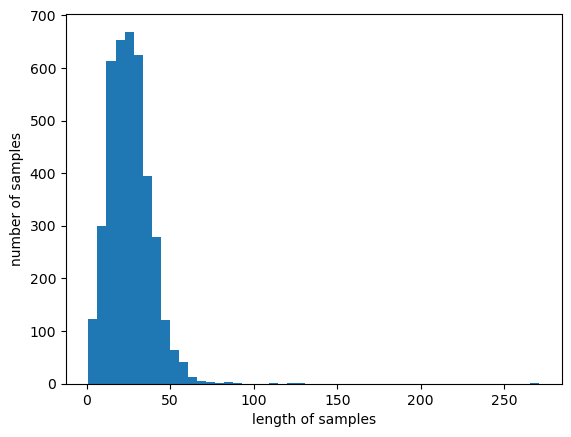

In [31]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
print('최대 길이 : ', max(len(l) for l in y_train))
print('평균 길이 : ', (sum(map(len, y_train))/len(y_train)))

최대 길이 :  271
평균 길이 :  25.722023505365357


In [33]:
# 각 단어별 태그임으로 최대 길이와 평균 길이가 동일한 모습을 살펴볼 수 있다.

In [34]:
max_len = 150
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [38]:
print(X_train[:2])

[[5601 3746    1 2024   86  331    1   46 2405    2  131   27    6 2025
   332  459 2026    3    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [  31 3746   20  177    4 5602 2915    1    2 2916  637  147    3    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0

In [36]:
print(y_train)

[[ 3  3  8 ...  0  0  0]
 [ 3  3 17 ...  0  0  0]
 [ 3  3  8 ...  0  0  0]
 ...
 [ 3 30  3 ...  0  0  0]
 [ 6 11 12 ...  0  0  0]
 [ 3 11  5 ...  0  0  0]]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape, X_test.shape)

(3131, 150) (783, 150)


In [44]:
print(y_train.shape, y_test.shape)

(3131, 150) (783, 150)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [61]:
import warnings
warnings.filterwarnings(action='ignore')

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units, return_sequences=True)) # 각 타임스탭마다 출력
model.add(Dense(tag_size, activation='softmax')) # + TimeDistributed Dense : 각 타임스탭에 지정된 레이어를 개별적으로 적용
# binary_crossentropy : 원-핫 인코딩
# sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         1457664   
                                                                 
 lstm_3 (LSTM)               (None, None, 128)         131584    
                                                                 
 dense_3 (Dense)             (None, None, 47)          6063      
                                                                 
Total params: 1595311 (6.09 MB)
Trainable params: 1595311 (6.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# callback 지정
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 1.8499 - accuracy: 0.7932WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 477ms/step - loss: 1.8499 - accuracy: 0.7932 - val_loss: 0.9077 - val_accuracy: 0.8251
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.7638 - accuracy: 0.8319WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 14s 576ms/step - loss: 0.7638 - accuracy: 0.8319 - val_loss: 0.7203 - val_accuracy: 0.8313
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.6747 - accuracy: 0.8348WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 14s 546ms/step - loss: 0.6747 - accuracy: 0.8348 - val_loss: 0.6643 - val_accuracy: 0.8274
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.6287 - accuracy: 0.8321WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 18s 747ms/step - loss: 0.6287 - accuracy: 0.8321 - val_loss: 0.6252 - val_accuracy: 0.8288
Epoch 5/20
25/25 [==============================] - ETA: 0s - loss: 0.5941 - accuracy: 0.8373WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 19s 763ms/step - loss: 0.5941 - accuracy: 0.8373 - val_loss: 0.5922 - val_accuracy: 0.8391
Epoch 6/20
25/25 [==============================] - ETA: 0s - loss: 0.5641 - accuracy: 0.8473WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 501ms/step - loss: 0.5641 - accuracy: 0.8473 - val_loss: 0.5707 - val_accuracy: 0.8462
Epoch 7/20
25/25 [==============================] - ETA: 0s - loss: 0.5418 - accuracy: 0.8520WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 486ms/step - loss: 0.5418 - accuracy: 0.8520 - val_loss: 0.5495 - val_accuracy: 0.8515
Epoch 8/20
25/25 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.8562WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 505ms/step - loss: 0.5244 - accuracy: 0.8562 - val_loss: 0.5354 - val_accuracy: 0.8546
Epoch 9/20
25/25 [==============================] - ETA: 0s - loss: 0.5103 - accuracy: 0.8593WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 505ms/step - loss: 0.5103 - accuracy: 0.8593 - val_loss: 0.5220 - val_accuracy: 0.8564
Epoch 10/20
25/25 [==============================] - ETA: 0s - loss: 0.4980 - accuracy: 0.8621WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 519ms/step - loss: 0.4980 - accuracy: 0.8621 - val_loss: 0.5078 - val_accuracy: 0.8611
Epoch 11/20
25/25 [==============================] - ETA: 0s - loss: 0.4844 - accuracy: 0.8690WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 509ms/step - loss: 0.4844 - accuracy: 0.8690 - val_loss: 0.4945 - val_accuracy: 0.8685
Epoch 12/20
25/25 [==============================] - ETA: 0s - loss: 0.4656 - accuracy: 0.8760WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 493ms/step - loss: 0.4656 - accuracy: 0.8760 - val_loss: 0.4718 - val_accuracy: 0.8737
Epoch 13/20
25/25 [==============================] - ETA: 0s - loss: 0.4390 - accuracy: 0.8852WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 505ms/step - loss: 0.4390 - accuracy: 0.8852 - val_loss: 0.4402 - val_accuracy: 0.8867
Epoch 14/20
25/25 [==============================] - ETA: 0s - loss: 0.4045 - accuracy: 0.9021WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 471ms/step - loss: 0.4045 - accuracy: 0.9021 - val_loss: 0.3973 - val_accuracy: 0.9059
Epoch 15/20
25/25 [==============================] - ETA: 0s - loss: 0.3642 - accuracy: 0.9133WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 482ms/step - loss: 0.3642 - accuracy: 0.9133 - val_loss: 0.3593 - val_accuracy: 0.9146
Epoch 16/20
25/25 [==============================] - ETA: 0s - loss: 0.3263 - accuracy: 0.9219WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 495ms/step - loss: 0.3263 - accuracy: 0.9219 - val_loss: 0.3233 - val_accuracy: 0.9215
Epoch 17/20
25/25 [==============================] - ETA: 0s - loss: 0.2903 - accuracy: 0.9299WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 490ms/step - loss: 0.2903 - accuracy: 0.9299 - val_loss: 0.2892 - val_accuracy: 0.9295
Epoch 18/20
25/25 [==============================] - ETA: 0s - loss: 0.2563 - accuracy: 0.9374WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 12s 491ms/step - loss: 0.2563 - accuracy: 0.9374 - val_loss: 0.2574 - val_accuracy: 0.9367
Epoch 19/20
25/25 [==============================] - ETA: 0s - loss: 0.2240 - accuracy: 0.9450WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 505ms/step - loss: 0.2240 - accuracy: 0.9450 - val_loss: 0.2274 - val_accuracy: 0.9444
Epoch 20/20
25/25 [==============================] - ETA: 0s - loss: 0.1932 - accuracy: 0.9550WARNING:tensorflow:Can save best model only with val_acc available, skipping.


25/25 [==============================] - 13s 508ms/step - loss: 0.1932 - accuracy: 0.9550 - val_loss: 0.1993 - val_accuracy: 0.9534


In [60]:
print('test acc : ', model.evaluate(X_test, y_test))

25/25 [==============================] - 2s 82ms/step - loss: 0.1993 - accuracy: 0.9534
test acc :  [0.19933128356933594, 0.9533674120903015]


In [67]:
# 결과확인
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word

i = 30
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1)

print('{:15}|{:5}|{}'.format('단어', '실제값', '예측값'))
print('-'*35)

for word, tag, pred in zip(X_test[i], y_test[i], y_predicted[0]):
    if word!=0:
        print('{:17}: {:7} {}'.format(index_to_word[word], index_to_tag[tag].upper(), index_to_tag[pred].upper()))

1/1 [==============================] - 0s 17ms/step
단어             |실제값  |예측값
-----------------------------------
sharedata        : NNP     VBP
develops         : VBZ     VB
and              : CC      WRB
markets          : VBZ     WP$
low-cost         : JJ      WP$
software         : NN      WP$
,                : ,       WP$
peripheral       : JJ      WP$
equipment        : NN      VBP
and              : CC      VBP
accessories      : NNS     SYM
for              : IN      SYM
computers        : NNS     PDT
.                : .       PDT
